# Lab #2: Probability, Distributions, and Statistical Questions

In [96]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math
from scipy import stats
from scipy import signal

plt.rcParams["figure.figsize"] = (15,10)

#### Problem 1

We are going to imagine that we are looking for gamma-ray sources. In this kind of telescope there is a background of cosmic rays that provides a discrete noise term across the sky that precisely follows a Poisson distribution. To detect a gamma ray source, you need to ask what is the probability that the cosmic ray background would have given you a measurement as signal-like or more than the signal you receive.

To set up this problem, we will assume that the average cosmic ray background in one day is 1, and that the average number of gamma rays emitted by our hypothetical source is 10.

##### A) Show how the probability distribution changes as you sum for more days:



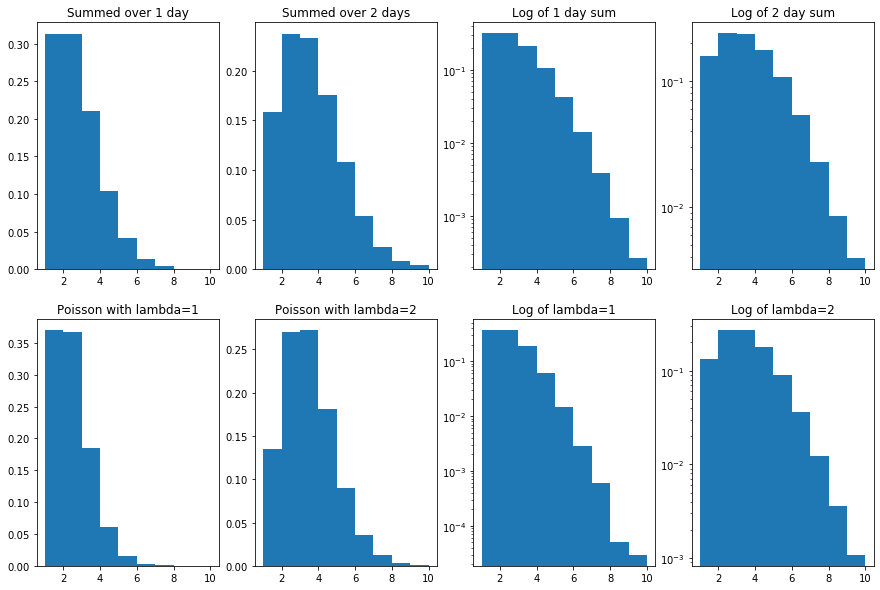

In [170]:
x = np.arange(0,10)
dist = stats.poisson.pmf(x,1)

p2 = scipy.signal.convolve(dist,dist)
x2 = np.arange(0,len(p2))

p3 = scipy.signal.convolve(p2,dist)
x3 = np.arange(0,len(p3))

pois_base = stats.rv_discrete(values=(x,dist)).rvs(size=100000)
pois_k2 = stats.poisson.rvs(1,1, size=100000)
pois_k3 = stats.poisson.rvs(2,1 ,size=100000)
day2 = stats.rv_discrete(values=(x2,p2)).rvs(size=100000)
day3 = stats.rv_discrete(values=(x3,p3)).rvs(size=100000)


fig, ((ax1,ax2,log1,log2), (ax3,ax4,log3,log4)) = plt.subplots(2,4)
# ax1.hist(pois_base, bins=range(1,11), density=True)
# ax1.title.set_text('Base Poisson Distribution')

ax1.title.set_text('Summed over 1 day')
ax1.hist(day2, bins=range(1,11),density=True)

ax2.title.set_text('Summed over 2 days')
ax2.hist(day3, bins=range(1,11),density=True)

ax3.title.set_text('Poisson with lambda=1')
ax3.hist(pois_k2, bins=range(1,11),density=True)

ax4.title.set_text('Poisson with lambda=2')
ax4.hist(pois_k3, bins=range(1,11),density=True)

log1.title.set_text('Log of 1 day sum')
log1.hist(day2, bins=range(1,11),density=True, log=True)

log2.title.set_text('Log of 2 day sum')
log2.hist(day3, bins=range(1,11),density=True, log=True)

log3.title.set_text('Log of lambda=1')
log3.hist(pois_k2, bins=range(1,11),density=True, log=True)

log4.title.set_text('Log of lambda=2')
log4.hist(pois_k3, bins=range(1,11),density=True, log=True)

plt.show()

As we can see, taking the sum over multiple days appears to be identical to increasing the lambda parameter of the poisson distribution. This is made especially obvious when comparing log plots.

##### B) Show that after 5 days, the summed probability distribution is still a Poisson distribution. Explain why this makes sense from a mathematical and conceptual point of view.

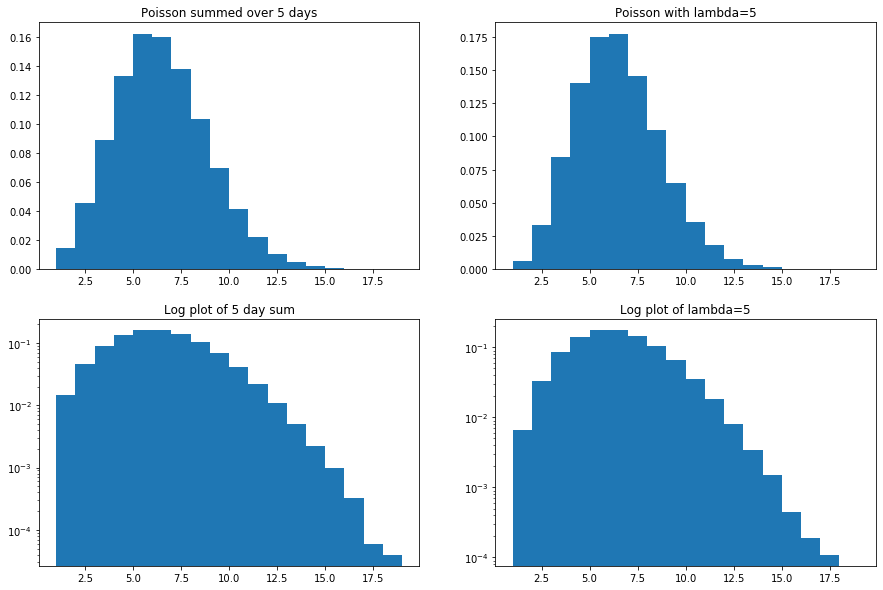

In [169]:
x_init = np.arange(0,10)
dist = stats.poisson.pmf(x_init,1)
p = stats.poisson.pmf(x_init,1)
for days in range(0,5):
    p = scipy.signal.convolve(p,dist)
    x = np.arange(0,len(p))

fig, ((ax1,ax2),(log1,log2)) = plt.subplots(2,2)
day5 = stats.rv_discrete(values=(x,p)).rvs(size=100000)
pois5 = stats.poisson.rvs(5,1 ,size=100000)

ax1.title.set_text('Poisson summed over 5 days')
ax1.hist(day5, bins=range(1,20), density=True)

log1.title.set_text('Log plot of 5 day sum')
log1.hist(day5, bins=range(1,20), density=True, log=True)

ax2.title.set_text('Poisson with lambda=5')
ax2.hist(pois5, bins=range(1,20),density=True)

log2.title.set_text('Log plot of lambda=5')
log2.hist(pois5, bins=range(1,20),density=True, log=True)


plt.show()

Once again, we find that the comparative log plots are nearly identical (and the differences between them can be attributed to natural sampling error), so it seems that the summed probability is indeed still a Poisson distribution.

This also makes sense from a conceptual perspective, because lambda represents the expected rate of occurences. As we extend the time window by convolving over several days, we naturally also increase the number of occurences we expect to see within that time window.

In [166]:
stats.poisson?

Signature:       stats.poisson(*args, **kwds)
Type:            poisson_gen
String form:     <scipy.stats._discrete_distns.poisson_gen object at 0x7f8b15a88610>
File:            /opt/conda/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py
Docstring:      
A Poisson discrete random variable.

As an instance of the `rv_discrete` class, `poisson` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(mu, loc=0, size=1, random_state=None)
    Random variates.
pmf(k, mu, loc=0)
    Probability mass function.
logpmf(k, mu, loc=0)
    Log of the probability mass function.
cdf(k, mu, loc=0)
    Cumulative distribution function.
logcdf(k, mu, loc=0)
    Log of the cumulative distribution function.
sf(k, mu, loc=0)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
logsf(k, mu, loc=0)
    Log of the survival function.
ppf